# 1. Code : Importing all the necessary Libraries.

In [1]:
# Importing necessary libraries for EDA.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
## If nltk is not present then run this command - pip install nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation


# Importing libraries necessary for Model Building and Training.
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 2. Code : Loading the Data.

In [2]:
data = pd.read_csv('/content/mail_data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

# 3. Code: Visualize data.

In [4]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
# Create Group column based on Category column.
data['Group'] = data['Category']
data['Group']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Group, Length: 5572, dtype: object

In [6]:
data

,Category,Message,Group
0,ham,"Go until jurong point, crazy.. Available only ...",ham
1,ham,Ok lar... Joking wif u oni...,ham
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,ham,U dun say so early hor... U c already then say...,ham
4,ham,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,spam
5568,ham,Will ü b going to esplanade fr home?,ham
5569,ham,"Pity, * was in mood for that. So...any other s...",ham
5570,ham,The guy did some bitching but I acted like i'd...,ham


In [7]:
for i in range(len(data)):
    if data['Group'].iloc[i] == 'spam':
        data['Group'].iloc[i] = 1
    else:
        data['Group'].iloc[i] = 0

In [8]:
# How many spam emails and normal emails?
freq = data.groupby(['Category'])['Category'].count()
freq

Category
ham     4825
spam     747
Name: Category, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

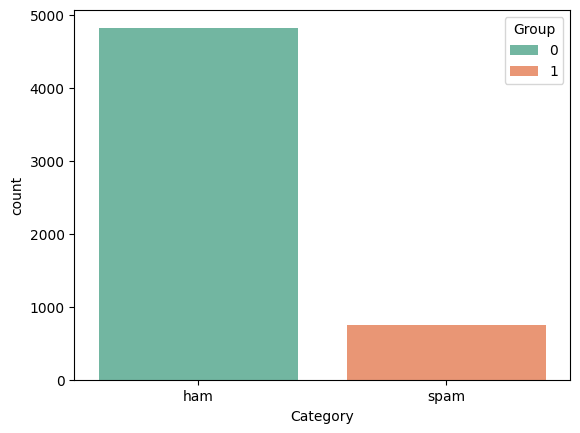

In [9]:
# Use a different colour palette in count plot.
sns.countplot(data = data, x ='Category', hue="Group", stat="count", palette = "Set2")

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage_countplot(data, x, hue):
    total = float(len(data))  # Total number of observations in the data.

    # Draw countplot
    ax = sns.countplot(x=x, hue=hue, data=data, palette = "Set2", stat="count")

    # Calculate percentages and add comments.
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
          ax.text(p.get_x() + p.get_width() / 2.,
                    height / 2 + p.get_y(),
                    '{:.2f}%'.format((height / total) * 100),
                    ha="center",
                    color="white")

    # Show chart.
    plt.show()

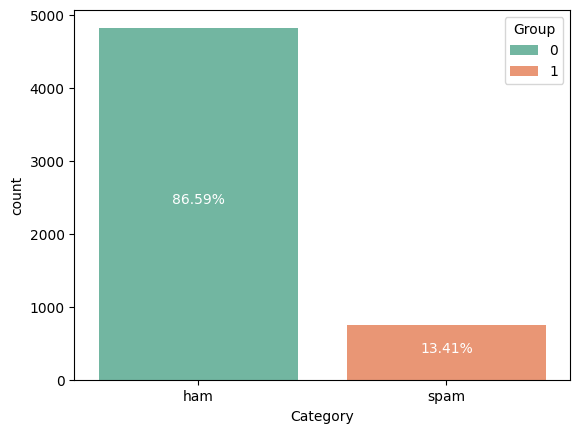

In [11]:
plot_percentage_countplot(data=data, x='Category', hue='Group')

## 4. Code : Imbalance in the data.

- We can clearly see that the number of Ham samples is more than the number of Spam samples, which implies that the data set we are using is imbalanced.

In [12]:
for i in range(len(data)):
    if data['Category'].iloc[i] == 'spam':
        data['Category'].iloc[i] = 1
    else:
        data['Category'].iloc[i] = 0

In [13]:
data

,Category,Message,Group
0,0,"Go until jurong point, crazy.. Available only ...",0
1,0,Ok lar... Joking wif u oni...,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,0,U dun say so early hor... U c already then say...,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,1
5568,0,Will ü b going to esplanade fr home?,0
5569,0,"Pity, * was in mood for that. So...any other s...",0
5570,0,The guy did some bitching but I acted like i'd...,0


## 4.1. Use the Downsampling method.

In [14]:
freq = data.groupby(['Category'])['Category'].count()
freq

Category
0    4825
1     747
Name: Category, dtype: int64

In [15]:
spam_msg = data[data.Category == 1]
len(spam_msg)

747

Text(0.5, 0, 'Message types')

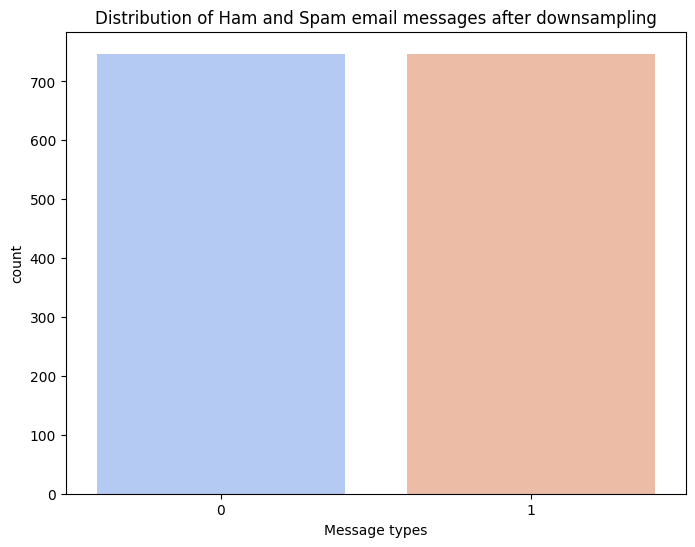

In [16]:
# Downsampling to balance the dataset.
ham_msg = data[data.Category == 0]
spam_msg = data[data.Category == 1]

# Get ham_msg equal to the data number of spam_msg.
ham_msg = ham_msg.sample(n=len(spam_msg),random_state=42)

# Concatenating the downsampled DataFrames.
balanced_data = pd.concat([ham_msg, spam_msg]).reset_index(drop=True)

# Plotting the counts of down sampled dataset.
plt.figure(figsize=(8, 6))
sns.countplot(data=balanced_data, x='Category', palette = "coolwarm")
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types')

In [17]:
ham_msg
# There are 747 normal messages.

,Category,Message,Group
3714,0,If i not meeting ü all rite then i'll go home ...,0
1311,0,"I.ll always be there, even if its just in spir...",0
548,0,"Sorry that took so long, omw now",0
1324,0,I thk 50 shd be ok he said plus minus 10.. Did...,0
3184,0,Dunno i juz askin cos i got a card got 20% off...,0
...,...,...,...
4992,0,We made it! Eta at taunton is 12:30 as planned...,0
3117,0,Uncle Abbey! Happy New Year. Abiola,0
4975,0,Aiyo u so poor thing... Then u dun wan 2 eat? ...,0
3505,0,Will you be here for food,0


In [18]:
spam_msg
# And 747 spam messages.

,Category,Message,Group
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,1
8,1,WINNER!! As a valued network customer you have...,1
9,1,Had your mobile 11 months or more? U R entitle...,1
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [19]:
balanced_data['Message'] = balanced_data['Message'].str.replace('Subject', '')
balanced_data.info()
# A total of 1,494 messages.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1494 non-null   object
 1   Message   1494 non-null   object
 2   Group     1494 non-null   object
dtypes: object(3)
memory usage: 35.1+ KB


In [20]:
# Remove punctuation.
# Maketrans function to convert.
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

balanced_data['Message']= balanced_data['Message'].apply(lambda x: remove_punctuations(x))
balanced_data.head()

,Category,Message,Group
0,0,If i not meeting ü all rite then ill go home l...,0
1,0,Ill always be there even if its just in spirit...,0
2,0,Sorry that took so long omw now,0
3,0,I thk 50 shd be ok he said plus minus 10 Did ü...,0
4,0,Dunno i juz askin cos i got a card got 20 off ...,0


- Stopwords are words that do not contribute to clarifying the meaning.

In [21]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output


balanced_data['Message'] = balanced_data['Message'].apply(lambda text: remove_stopwords(text))
balanced_data.head()

,Category,Message,Group
0,0,meeting ü rite ill go home lor ü dun feel like...,0
1,0,ill always even spirit ill get bb soon trying ...,0
2,0,sorry took long omw,0
3,0,thk 50 shd ok said plus minus 10 ü leave line ...,0
4,0,dunno juz askin cos got card got 20 4 salon ca...,0


In [23]:
len(balanced_data['Message'])

1494

In [24]:
len(balanced_data['Category'])

1494

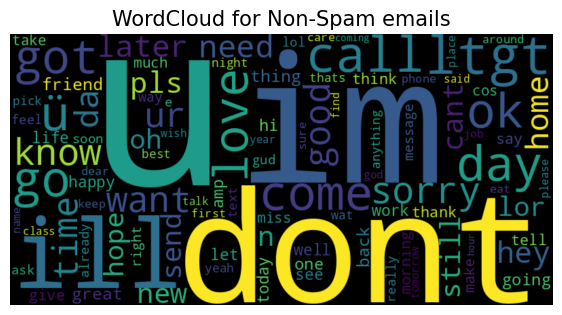

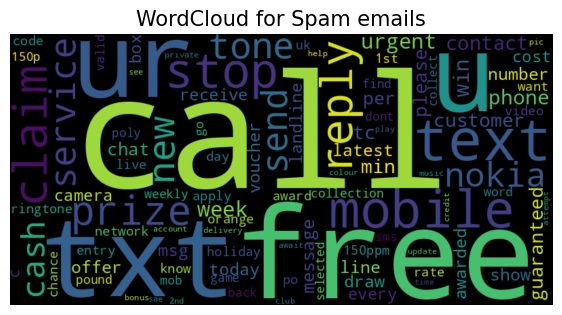

In [25]:
from wordcloud import WordCloud
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['Message'])

    plt.figure(figsize=(7, 7))

    wc = WordCloud(background_color='black',
                   max_words=100, # The maximum word limit in WordCloud representation is 100 words.
                   width=800,
                   height=400,
                   collocations=False).generate(email_corpus) # Do not display paired words.

    plt.imshow(wc, interpolation='bilinear') # Use linear interpolation for display.
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()

plot_word_cloud(balanced_data[balanced_data['Category'] == 0], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['Category'] == 1], typ='Spam')

## 5. Convert Word2Vec.

- Because machine learning models only understand numbers, not text, we need this conversion step.

In [26]:
balanced_data['Message']

0       meeting ü rite ill go home lor ü dun feel like...
1       ill always even spirit ill get bb soon trying ...
2                                     sorry took long omw
3       thk 50 shd ok said plus minus 10 ü leave line ...
4       dunno juz askin cos got card got 20 4 salon ca...
                              ...                        
1489    want explicit sex 30 secs ring 02073162414 cos...
1490    asked 3mobile 0870 chatlines inclu free mins i...
1491    contract mobile 11 mnths latest motorola nokia...
1492    reminder o2 get 250 pounds free call credit de...
1493    2nd time tried 2 contact u u £750 pound prize ...
Name: Message, Length: 1494, dtype: object

# 6. Train test split.

In [27]:
# Input is text mail data.
# Output is 0 and 1 to see whether spam or normal.
train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['Message'],
                                                    balanced_data['Category'],
                                                    test_size = 0.2,
                                                    random_state = 42)

#7. What is Padding?
- Pad sequences are adding buffers to the matrix.
- It adds elements to the input matrix before applying any convolution filter and thus it aids in preventing any loss of information, especially from the edges of the image.

In [28]:
# Tokenize the text data.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

# After tokenizing, we convert text to numbers.
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

# Pad sequences to have the same length.
max_len = 100  # Maximum sequence length.
train_sequences = pad_sequences(train_sequences,
                                maxlen=max_len,
                                padding='post',
                                truncating='post')
test_sequences = pad_sequences(test_sequences,
                               maxlen=max_len,
                               padding='post',
                               truncating='post')

In [29]:
print(train_sequences)

[[ 449  198   46 ...    0    0    0]
 [  87   36    1 ...    0    0    0]
 [ 332 1055   82 ...    0    0    0]
 ...
 [ 232   31   29 ...    0    0    0]
 [  24   10   52 ...    0    0    0]
 [  63  459  765 ...    0    0    0]]


# 8. Model development and evaluation.

In [50]:
print(tokenizer)

In [48]:
print(len(tokenizer.word_index) + 1)

4132


In [30]:
# Build the model.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
                                    output_dim=32,
                                    input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           132224    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 135937 (531.00 KB)
Trainable params: 135937 (531.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'],
              optimizer = 'adam')

In [32]:
es = EarlyStopping(patience=5,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 3,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 1)

In [33]:
train_sequences

array([[ 449,  198,   46, ...,    0,    0,    0],
       [  87,   36,    1, ...,    0,    0,    0],
       [ 332, 1055,   82, ...,    0,    0,    0],
       ...,
       [ 232,   31,   29, ...,    0,    0,    0],
       [  24,   10,   52, ...,    0,    0,    0],
       [  63,  459,  765, ...,    0,    0,    0]], dtype=int32)

In [34]:
train_sequences_tensor = tf.convert_to_tensor(train_sequences)

In [35]:
print(type(train_sequences[0]))

<class 'numpy.ndarray'>


In [36]:
train_sequences = np.array(train_sequences, dtype=np.float32)

In [37]:
print(train_sequences_tensor.shape)

(1195, 100)


In [38]:
train_sequences_tensor = tf.convert_to_tensor(train_sequences.tolist())

In [39]:
print(train_sequences_tensor)

tf.Tensor(
[[4.490e+02 1.980e+02 4.600e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [8.700e+01 3.600e+01 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.320e+02 1.055e+03 8.200e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.320e+02 3.100e+01 2.900e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.400e+01 1.000e+01 5.200e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [6.300e+01 4.590e+02 7.650e+02 ... 0.000e+00 0.000e+00 0.000e+00]], shape=(1195, 100), dtype=float32)


In [40]:
print(type(train_sequences_tensor))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [41]:
print(train_Y)

532     0
534     0
1108    1
490     0
933     1
       ..
1130    1
1294    1
860     1
1459    1
1126    1
Name: Category, Length: 1195, dtype: object


In [42]:
print(type(train_Y))

<class 'pandas.core.series.Series'>


In [43]:
# Convert sang int mới train được, hiện tại 0 và 1 đang ở kiểu text.
train_Y = train_Y.astype(int).values

In [44]:
# Convert sang int mới train được, hiện tại 0 và 1 đang ở kiểu text.
test_Y = test_Y.astype(int).values

In [45]:
# Train the model
history = model.fit(train_sequences_tensor, train_Y,
                    validation_data=(test_sequences, test_Y),
                    epochs=20,
                    batch_size=32,
                    callbacks = [lr, es]
                   )

Epoch 1/20
38/38 [==============================] - 6s 55ms/step - loss: 0.6940 - accuracy: 0.4795 - val_loss: 0.6931 - val_accuracy: 0.5151 - lr: 0.0010
Epoch 2/20
38/38 [==============================] - 1s 39ms/step - loss: 0.6933 - accuracy: 0.4971 - val_loss: 0.6933 - val_accuracy: 0.4849 - lr: 0.0010
Epoch 3/20
38/38 [==============================] - 1s 37ms/step - loss: 0.6933 - accuracy: 0.4820 - val_loss: 0.6933 - val_accuracy: 0.4849 - lr: 0.0010
Epoch 4/20
37/38 [============================>.] - ETA: 0s - loss: 0.6932 - accuracy: 0.5051
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
38/38 [==============================] - 1s 39ms/step - loss: 0.6932 - accuracy: 0.5038 - val_loss: 0.6933 - val_accuracy: 0.4849 - lr: 0.0010
Epoch 5/20
38/38 [==============================] - 1s 38ms/step - loss: 0.6932 - accuracy: 0.5038 - val_loss: 0.6933 - val_accuracy: 0.4849 - lr: 5.0000e-04
Epoch 6/20
38/38 [==============================] - 2s 49ms/step - 